In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-06-17 17:30:34.896875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750181434.913036   45949 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750181434.918073   45949 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750181434.931675   45949 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750181434.931703   45949 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750181434.931705   45949 computation_placer.cc:177] computation placer alr

In [2]:
folder_path = "Content/utkface_aligned_cropped/UTKFace"

In [3]:
# Prepare lists
age = []
gender = []
img_paths = []

# Loop through files safely
for file in os.listdir(folder_path):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')) and '_' in file:
        parts = file.split('_')
        try:
            a = int(parts[0])
            g = int(parts[1])
            age.append(a)
            gender.append(g)
            img_paths.append(os.path.join(folder_path, file))
        except ValueError:
            print(f"Skipping invalid file: {file}")


In [4]:
# Print status
print(f"Total valid images loaded: {len(img_paths)}")

Total valid images loaded: 5988


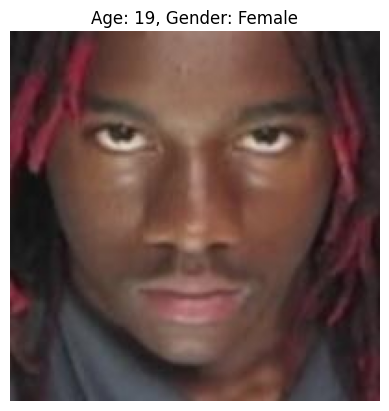

In [5]:
import cv2
import matplotlib.pyplot as plt
# Show one sample image with age and gender
if img_paths:
    img = cv2.imread(img_paths[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Age: {age[0]}, Gender: {'Male' if gender[0]==1 else 'Female'}")
    plt.axis('off')
    plt.show()
else:
    print("No valid images found.")

In [6]:
len(age)

5988

In [8]:
df = pd.DataFrame({'age':age,'gender':gender,'img':img_paths})

In [9]:
df.shape

(5988, 3)

In [10]:
df.head()

,age,gender,img
0,19,0,Content/utkface_aligned_cropped/UTKFace/19_0_1...
1,26,0,Content/utkface_aligned_cropped/UTKFace/26_0_0...
2,26,0,Content/utkface_aligned_cropped/UTKFace/26_0_0...
3,26,0,Content/utkface_aligned_cropped/UTKFace/26_0_0...
4,1,1,Content/utkface_aligned_cropped/UTKFace/1_1_2_...


In [11]:
train_df = df.sample(frac=1,random_state=0).iloc[:5000]
test_df = df.sample(frac=1,random_state=0).iloc[5000:]

In [12]:
train_df.shape

(5000, 3)

In [13]:
test_df.shape

(988, 3)

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# Check sample image path resolution
import os

for img in train_df['img'].head():
    full_path = os.path.join(folder_path, img)
    if not os.path.exists(full_path):
        print("Missing:", full_path)


Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/21_1_1_20170112231854926.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/24_0_4_20170117145917765.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/26_0_0_20170113210319024.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/15_1_0_20170104013549874.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/24_0_3_20170119165948191.jpg.chip.jpg


In [22]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=folder_path,
    x_col='img',
    y_col=['age', 'gender'],
    target_size=(200, 200),
    class_mode='raw',  # Corrected
    batch_size=32,
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=folder_path,
    x_col='img',
    y_col=['age', 'gender'],
    target_size=(200, 200),
    class_mode='raw',  # Corrected
    batch_size=32,
    shuffle=False
)


Found 0 validated image filenames.
Found 0 validated image filenames.


/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5000 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  warnings.warn(
/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 988 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  warnings.warn(


In [23]:
print(train_df['img'].head())
print("Directory path:", folder_path)

1034    Content/utkface_aligned_cropped/UTKFace/21_1_1...
3368    Content/utkface_aligned_cropped/UTKFace/24_0_4...
737     Content/utkface_aligned_cropped/UTKFace/26_0_0...
3862    Content/utkface_aligned_cropped/UTKFace/15_1_0...
130     Content/utkface_aligned_cropped/UTKFace/24_0_3...
Name: img, dtype: object
Directory path: Content/utkface_aligned_cropped/UTKFace


In [24]:
import os

missing = 0
for fname in train_df['img']:
    path = os.path.join(folder_path, fname)
    if not os.path.exists(path):
        print("Missing:", path)
        missing += 1

print(f"Total missing files: {missing} out of {len(train_df)}")

Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/21_1_1_20170112231854926.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/24_0_4_20170117145917765.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/26_0_0_20170113210319024.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/15_1_0_20170104013549874.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/24_0_3_20170119165948191.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/19_0_2_20170102234958195.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/17_0_0_20170103201534007.jpg.chip.jpg
Missing: Content/utkface_aligned_cropped/UTKFace/Content/utkface_aligned_cropped/UTKFace/16_0_4_201701102316315